## Reto 4: Gráficas de densidad

### 1. Objetivos:
    - Utilizar gráficas de densidad para realizar comparaciones entre conjuntos de datos.
 
---
    
### 2. Desarrollo:

#### a) Comparando histogramas de diferentes categorías

Dijimos que las gráficas de densidad nos pueden ser útiles para comparar dos o más distribuciones. ¿En qué contexto podríamos utilizar esto? Para practicar este tipo de comparaciones vamos a utilizar un dataset llamado `athlete_olympic_events-clean.csv`. Este dataset contiene datos sobre participaciones de atletas en las Olimpiadas. Cada fila es la participación de un atleta una Olimpiada. Los atletas, obviamente, pueden repetirse, ya que es posible que hayan participado varias veces en una Olimpiada o que hayan asistido a múltiples Olimpiadas.

La columna 'sex' clasifica a los atletas en dos categorías: 'M' (male) y 'F' (female). En las columnas 'age', 'height' y 'weight' tenemos datos numéricos. Lo que queremos es comparar las edades, alturas y pesos de hombres y mujeres atletas usando gráficas de densidad. Para lograr esto, realiza los siguientes pasos:

1. Lee el dataset athlete_olympic_events-clean.csv
2. Recuerda que hay filas en las que los atletas se repiten. Afortunadamente, el índice es un id único para cada atleta. Hay varias formas de agrupar nuestros datos para que sólo haya una sola entrada por atleta. Vamos a usar una que utiliza varias herramientas que ya conocemos:
    - Primero agrupa tus datos usando el índice (esto se puede lograr con el método `groupby(level=0)`, indexa solamente las columnas 'age', 'height' y 'weight' y aplica la función `mean`. Esto nos va a dar un `DataFrame` con el promedio de edad, peso y altura de cada atleta a través de todas sus participaciones en Olimpiadas
    - Después tenemos que agregar la columna 'sex' para poder separar nuestros datos en categorías (no pudimos pedirla también en el paso anterior por que no es posible sacar un promedio de las letras 'M' y 'F'). Para eso, primero extrae tu columna 'sex' y realiza de nuevo una agrupación por índice aplicando la agregación 'last'. Esto te dará una `Serie` de la columna 'sex' agrupada por atleta.
    - Ahora, usando el método `pd.merge` agrega la información de 'sex' a la agrupación de promedios que realizamos anteriormente.
    - Listo ahora tenemos un `DataFrame` con nuestra columnas 'sex', 'age', 'height' y 'weight' donde los atletas no se repiten.
3. Ahora usa filtros para separar tus datos en atletas hombre y mujeres.
4. Finalmente usa gráficas de densidad para graficar las columnas 'age', 'height' y 'weight' (cada una en una gráfica distinta) y comparar las distribuciones de ambos sexos en diferentes variables. Por ejemplo, en una gráfica tendrás la distribución de las edades de los atletas hombres al lado de la distribución de las edades de las atletas mujeres.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../Datasets/athlete_olympic_events-clean.csv")

In [ ]:
por_atleta = df.groupby(level=0)["age","height","weight"].mean()
por_atleta

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,height,weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,21.0,185.0,82.0
3,21.0,185.0,82.0
4,25.0,185.0,82.0
...,...,...,...
206160,29.0,179.0,89.0
206161,27.0,176.0,59.0
206162,27.0,176.0,59.0
206163,30.0,185.0,96.0


In [ ]:
sex = df.groupby(level=0)['sex'].last()
sex

0         M
1         M
2         F
3         F
4         F
         ..
206160    M
206161    M
206162    M
206163    M
206164    M
Name: sex, Length: 206165, dtype: object

In [ ]:
merged = por_atleta.merge(sex,left_index=True,right_index=True)
merged

,age,height,weight,sex
0,24.0,180.0,80.0,M
1,23.0,170.0,60.0,M
2,21.0,185.0,82.0,F
3,21.0,185.0,82.0,F
4,25.0,185.0,82.0,F
...,...,...,...,...
206160,29.0,179.0,89.0,M
206161,27.0,176.0,59.0,M
206162,27.0,176.0,59.0,M
206163,30.0,185.0,96.0,M


In [ ]:
males = por_atleta[merged['sex']=='M']
males

,age,height,weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
8,31.0,188.0,75.0
9,31.0,188.0,75.0
10,31.0,188.0,75.0
...,...,...,...
206160,29.0,179.0,89.0
206161,27.0,176.0,59.0
206162,27.0,176.0,59.0
206163,30.0,185.0,96.0


In [ ]:
female = por_atleta[merged['sex']=='F']
female

,age,height,weight
2,21.0,185.0,82.0
3,21.0,185.0,82.0
4,25.0,185.0,82.0
5,25.0,185.0,82.0
6,27.0,185.0,82.0
...,...,...,...
206130,33.0,168.0,80.0
206149,36.0,171.0,63.0
206151,19.0,171.0,64.0
206152,23.0,171.0,64.0


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

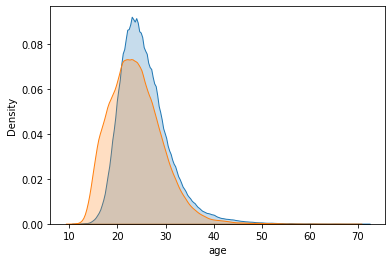

In [ ]:
sns.distplot(males['age'],hist=False,kde_kws={'shade':True})
sns.distplot(female['age'],hist=False,kde_kws={'shade':True})

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

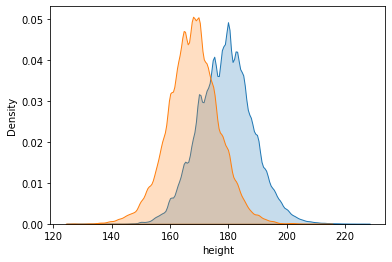

In [ ]:
sns.distplot(males['height'],hist=False,kde_kws={'shade':True})
sns.distplot(female['height'],hist=False,kde_kws={'shade':True})


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

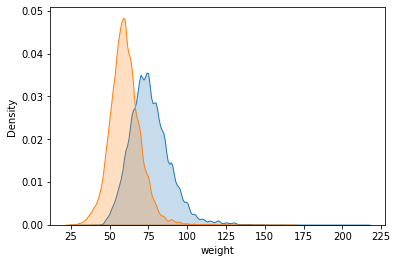

In [ ]:
sns.distplot(males['weight'],hist=False,kde_kws={'shade':True})
sns.distplot(female['weight'],hist=False,kde_kws={'shade':True})


<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']
sns.distplot(males['age'], hist=False, kde_kws = {'shade': True})
sns.distplot(females['age'], hist=False, kde_kws = {'shade': True})
```
    
</details>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>